In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import copy

In [ ]:
def calc_conjunctive_vel(animal_vel):
    # Function that computes east- and west-conjunctive velocities from animal velocity
    if animal_vel > 0:
        v_East = animal_vel
        v_West = 0
    else:
        v_East = 0
        v_West = -animal_vel       
    return v_East, v_West

def calc_conjunctive_FR(s,animal_vel,v_C0):
    # Function that computes firing rates of east- and west-conjunctive cells
    v_East, v_West = calc_conjunctive_vel(animal_vel)
    sEC = v_East/v_C0*s
    sWC = v_West/v_C0*s
    return sEC, sWC

def calc_LMcellFR(position):
    # Function that computes firing rates of landmark (LM) cells
    
    return sL

def relu(input_current):
    fr = np.maximum(0,input_current)
    return fr

def setJ(N):
    # Function that computes non-conjunctive connection weights J_ij,
    # i.e. pairwise cellular interactions
    # Short-range excitation; mid-range inhibition
    # Cosine weights
    J = np.zeros((N,N))
    for m in range(N):
        for n in range(N):
            thetam = 2*np.pi*m/N
            thetan = 2*np.pi*n/N
            J[m,n] = np.cos(thetam - thetan)-1
    return J
'''
def setJ_vel_E(N, shift_PI):
    J = np.zeros((N,N))
    for m in range(N):
        for n in range(N):
            thetam = 2*np.pi*m/N
            thetan = 2*np.pi*n/N
            if m-n == -shift_PI:
                J[m,n] = np.cos(thetam - thetan)-1
    return J

def setJ_vel_W(N, shift_PI):
    J = np.zeros((N,N))
    for m in range(N):
        for n in range(N):
            thetam = 2*np.pi*m/N
            thetan = 2*np.pi*n/N
            if m-n == shift_PI:
                J[m,n] = np.cos(thetam - thetan)-1
    return J
'''
# def update_LMweights(w_T, s):
#    dW_T = 
#    return 

def internal_dynamics(s,dt,tau_m,J,b):
  # b is the internal excitatory drive for bump to sustain
    #ds = dt*(-s/tau_m + relu(J @ s) + e_PI*sEC + e_PI*sWC + e_LM*(W @ sL))
    ds = (dt/tau_m)*(-s + relu(J @ s+ b))
    s_new = s + ds
    return s_new
'''
under internal dynamics initialization determines phase, excitatory drive b determines peak amplitude; peak
decays away without b 
'''
def updateFR(s,dt,tau_m,J,v,e_PI,v_C0,shift_PI,b):
  # b is the internal excitatory drive for bump to sustain
    sEC, sWC = calc_conjunctive_FR(s,v,v_C0)
    sEC = np.roll(sEC,shift_PI) # modify: scale vel phase-shift by v
    sWC = np.roll(sWC,-shift_PI) # modify: scale vel phase-shift by v
    #b_e = b*(1+g_b*v/v_C0)
    #b_w = b*(1-g_b*v/v_C0)
    #ds = dt*(-s/tau_m + relu(J @ s) + e_PI*sEC + e_PI*sWC + e_LM*(W @ sL))
    ds = (dt/tau_m)*(-s + relu(J @ s+ b+e_PI*(J @ sEC) + e_PI*(J @ sWC))) # No visual input
    s_new = s + ds
    return s_new, sEC, sWC
'''
under integration dynamics: bump amplitude scales with main ring excitatory drive b divided by the velocity
input drive b_1, it also sclaes with v/v_C0, velocity increase drives increase in bump amplitude but not 
traveling speed
bump traveling speed is determined by the factor shift_PI. More skewed connection increases bump traveling 
speed
'''

'\nunder integration dynamics: bump amplitude scales with main ring excitatory drive b divided by the velocity\ninput drive b_1, it also sclaes with v/v_C0, velocity increase drives increase in bump amplitude but not \ntraveling speed\nbump traveling speed is determined by the factor shift_PI. More skewed connection increases bump traveling \nspeed\n'

In [ ]:
tau_m = 10  # Time constant for network dynamics, i.e. leak time
e_PI  = 0  # Path integration (PI) perturbation strength
e_LM  = 0 # Landmark (LM) cell perturbation strength
N = 256      # Number of units on the ring
v = -300      # Animal velocity
v_C0 = 10    # Conjunctive characteristic speed
dt = 0.01
g_b = 5
b = 50
J = setJ(N)

#s = np.random.random((N,1)) # Initialize activity on the ring, units indexed by u
s = np.random.normal(0,0.1,(N,1))
#u = np.arange(N)+1-N/2
#s = np.cos(2*np.pi*u/N)
#s = relu(s)

shift_PI = 15 # Shift in outgoing connections of velocity-conjunctive cells

In [ ]:
numSteps = 50000
temp = np.empty((N,numSteps))
w_vel = np.empty((N,numSteps))
e_vel = np.empty((N,numSteps))
for step in range(numSteps):
    #if step<6000:
        #s = internal_dynamics(s,dt,tau_m,J,b)
    #else: 
    s, sEC, sWC = updateFR(s,dt,tau_m,J,v,e_PI,v_C0,shift_PI,b, g_b)
    #s = internal_dynamics(s,dt,tau_m,J,b)
    temp[:,step] = s.flatten()
    e_vel[:,step] = sEC.flatten()
    w_vel[:,step] = sWC.flatten()

In [ ]:
peak = np.zeros((1, numSteps))
peakA = np.zeros((1, numSteps))

peak_wVel = np.zeros((1, numSteps))
peak_eVel = np.zeros((1, numSteps))

for i in range(numSteps):
    peak_t = np.where(temp[:,i]==max(temp[:,i]))     # Find peak of bump activity on main ring
    wVel_top = np.where(w_vel[:,i]==max(w_vel[:,i])) # Find peak activity of west cells
    eVel_top = np.where(e_vel[:,i]==max(e_vel[:,i])) # Find peak activity of east cells
    if np.size(peak_t) == 1:
        #print(int(np.array(peaklsca).flatten()))
        peak[0,i] = int(np.array(peak_t).flatten())
        peakA[0,i] = max(temp[:,i])
        peak_wVel[0,i] = int(np.array(wVel_top[0][0]).flatten())
        peak_eVel[0,i] = int(np.array(eVel_top[0][0]).flatten())

Text(0, 0.5, 'Peak amplitude')

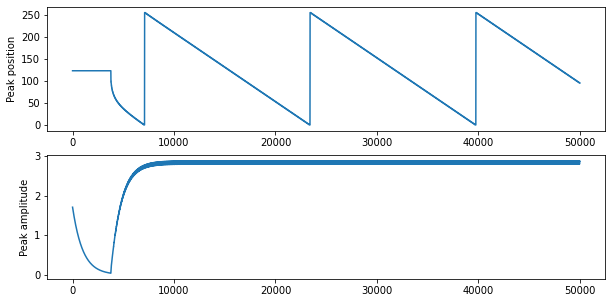

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak.flatten())
ax[0].set_ylabel('Peak position')
ax[1].plot(timex, peakA.flatten())
ax[1].set_ylabel('Peak amplitude')
#ax[0].imshow(temp)a=[]
#ax[1].imshow(w_vel)
#ax[2].imshow(e_vel)
#plt.xlabel('Time step')
#plt.ylabel('Neuron number')

# v=-1, phase-shift=5

NameError: name 'diff' is not defined

In [ ]:
250/((23721-7402)*dt)

1.5319566149886636

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak.flatten())
ax[1].plot(timex, peakA.flatten())
#ax[0].imshow(temp)a=[]
#ax[1].imshow(w_vel)
#ax[2].imshow(e_vel)
#plt.xlabel('Time step')
#plt.ylabel('Neuron number')

# v=-10, phase-shift=5

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak.flatten())
ax[1].plot(timex, peakA.flatten())
#ax[0].imshow(temp)a=[]
#ax[1].imshow(w_vel)
#ax[2].imshow(e_vel)
#plt.xlabel('Time step')
#plt.ylabel('Neuron number')

# v=-20, phase-shift=5

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak.flatten())
ax[1].plot(timex, peakA.flatten())
#ax[0].imshow(temp)a=[]
#ax[1].imshow(w_vel)
#ax[2].imshow(e_vel)
#plt.xlabel('Time step')
#plt.ylabel('Neuron number')

# v=-100, phase-shift=5

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak.flatten())
ax[1].plot(timex, peakA.flatten())
#ax[0].imshow(temp)a=[]
#ax[1].imshow(w_vel)
#ax[2].imshow(e_vel)
#plt.xlabel('Time step')
#plt.ylabel('Neuron number')

# v=-200, phase-shift=5

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak.flatten())
ax[1].plot(timex, peakA.flatten())
#ax[0].imshow(temp)a=[]
#ax[1].imshow(w_vel)
#ax[2].imshow(e_vel)
#plt.xlabel('Time step')
#plt.ylabel('Neuron number')

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
timex = np.arange(numSteps)
ax[0].plot(timex, peak_wVel.flatten())
ax[1].plot(timex, peak_eVel.flatten())

Hebbian Plasticity

In [ ]:
# global parameters
N = 256  # Number of ring neurons
M = 20  # Number of landmark neurons
dt = 0.1
tau_m = 1
v_C0 = 1
#v = 300      # Animal velocity
shift_PI = 10
J = setJ(N)
b = 40
#g_b = 5
e_LM = 0.1
e_PI = 0.1

In [ ]:
def find_peak(s_t):
    peaks = np.where(s_t==max(s_t))     # Find peak of bump activity on left ring
    if np.size(peaks) == 1:
    #print(int(np.array(peaklsca).flatten()))
        peaks = int(np.array(peaks).flatten())
        peaksA = max(s_t)
    else: 
        peaks = 0
        peaksA = 0
    return peaks,peaksA

def calc_animal_pos(num_session, step ,animal_vel,period_0=15):
  real_time = dt*np.arange(num_session*step)
  animal_pos = real_time*animal_vel
  period = (animal_pos[-1]+1)/(period_0*num_session)
  animal_pos = animal_pos%period
  return animal_pos

def generate_visual(peak_I, M, sd=2):
  phase_I = 2*np.pi*peak_I/(N-1)
  peak_L = math.floor(phase_I*(M-1)/(2*np.pi))
  #inds = round(phase_L*N/(2*np.pi))
  #print(len(inds))
  visual_num = np.arange(M)
  visual = 100*norm.pdf(visual_num, peak_L, sd)
  return visual.T, peak_L

#def generate_visual_test(animal_pos, M):


def updateFR(s,v,e_PI):
  # b is the internal excitatory drive for bump to sustain
    sEC, sWC = calc_conjunctive_FR(s,v,v_C0)
    sEC = np.roll(sEC,shift_PI) # modify: scale vel phase-shift by v
    sWC = np.roll(sWC,-shift_PI) # modify: scale vel phase-shift by v
    #b_e = b*(1+g_b*v/v_C0)
    #b_w = b*(1-g_b*v/v_C0)
    #ds = dt*(-s/tau_m + relu(J @ s) + e_PI*sEC + e_PI*sWC + e_LM*(W @ sL))
    ds = (dt/tau_m)*(-s + relu(J @ s+ b+e_PI*(J @ sEC) + e_PI*(J @ sWC))) # No visual input
    s_new = s + ds
    return s_new #, sEC, sWC

def updateFR_with_visual(s,sL,v,e_PI,W_LM): # Does this also need W_LM and sL as inputs?
  # b is the internal excitatory drive for bump to sustain
    sEC, sWC = calc_conjunctive_FR(s,v,v_C0)
    sEC = np.roll(sEC,shift_PI)
    sWC = np.roll(sWC,-shift_PI)
    #ds = dt*(-s/tau_m + relu(J @ s) + e_PI*sEC + e_PI*sWC + e_LM*(W @ sL))
    ds = (dt/tau_m)*(-s + relu(J @ s+b +  e_PI*(J @ sEC) + e_PI*(J @ sWC) + e_LM* (W_LM @ sL))) # No visual input
    s_new = s + ds
    return s_new #, sEC, sWC

def hebbian_plasticity(W_LM, session_avg, visual_avg, dT):
    W_LM_new = np.zeros((N,M))
    d_W = np.zeros((N,M))
    for u in range(N):
        for i in range(M):
            #print (session_avg_l)
            if  visual_avg[i,0] != 0:
              dW_LM_iu = dT*(session_avg[u,i]/visual_avg[i,0] - W_LM[u,i])
            else:
              dW_LM_iu = dT*(0 - W_LM[u,i])
            d_W[u,i] = dW_LM_iu
            W_LM_new[u,i] = W_LM_new[u,i]+dW_LM_iu
    W_LM_new = W_LM_new/np.linalg.norm(W_LM_new)
    return W_LM_new,d_W 

def training(W_LM, s_0, animal_vel, num_session, e_PI, step):
  s = np.zeros((N, num_session*step))
  s[:,0] = s_0
  peaks = np.zeros(num_session*step)
  peak_L = np.zeros(num_session*step)
  peaksA = np.zeros(num_session*step)
  #k_A = np.zeros(num_session*step)
  animal_pos = calc_animal_pos(num_session,step,animal_vel)
  #s_inds, sL, k_L = generate_visual(animal_pos, M)
  dT = dt*step
  session_avg = np.zeros((N,M))
  visual_avg = np.zeros((M,1))
  visual = np.zeros((M,num_session*step))
  for i in range(num_session*step-1):
      peaks[i], peaksA[i] = find_peak(s[:,i])
      if i <= 1000:
        s[:,i+1] = updateFR(s[:,i],animal_vel,e_PI)
      else:
        visual[:,i], peak_L[i] = generate_visual(peaks[i], M)
        session_avg = session_avg+s[:,i].reshape(N,1) @ visual[:,i].reshape(1,M)
        visual_avg = visual_avg+visual[:,i]
        s[:,i+1] = updateFR_with_visual(s[:,i],visual[:,i],animal_vel,e_PI,W_LM)
        if (i+1)%step == 0:
          W_LM,d_W = hebbian_plasticity(W_LM, session_avg, visual_avg, dT)
          session_avg = np.zeros((N,M))
          visual_avg = np.zeros((M,1))
  return W_LM, s, peaks, peaksA, d_W, visual, peak_L

In [ ]:
W_LM = np.random.rand(N,M)
num_session = 10
step = 4000
np.random.seed(0)
s_0 = np.random.normal(0,0.1,(N))
W_LM, s, peaks, peaksA,d_W,visual, peak_L = training(W_LM, s_0, 15, num_session, e_PI, step)

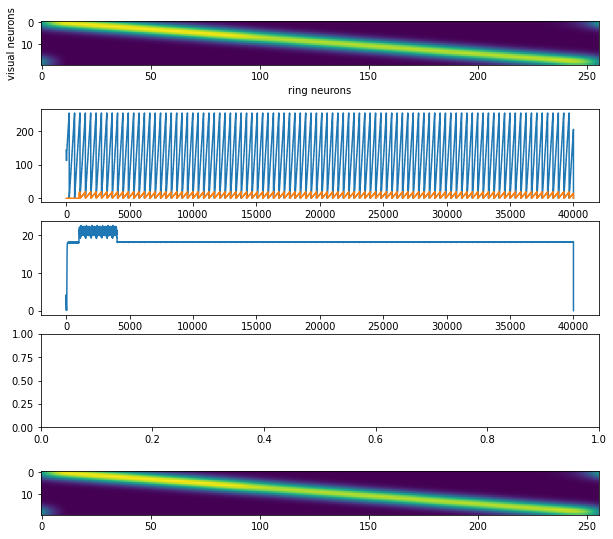

In [ ]:
fig, ax = plt.subplots(5,1,figsize=(10,10))
ax[0].imshow(W_LM.T)       
ax[0].set_xlabel('ring neurons')                 # Landmark weights from Hebbian learning
ax[0].set_ylabel('visual neurons') 
ax[1].plot(np.arange(step*num_session), peaks)       # Phase of network
ax[1].plot(np.arange(step*num_session), peak_L)  
#ax[1].plot(np.arange(step*num_session), s_inds)      # True phase
#ax[1].plot(np.arange(step*num_session), animal_pos)
ax[2].plot(np.arange(step*num_session), peaksA)      # Amplitude of bump activity
#ax[3].plot(np.arange(step*num_session), phase_diff)  # Phase difference
ax[4].imshow(d_W.T)

In [ ]:
learned_W = W_LM
training_visual = visual
training_phase = 2*np.pi*peak_L/(M-1)

In [ ]:
max(training_phase)

6.283185307179586

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

Text(0, 0.5, 'Visual \n neurons')

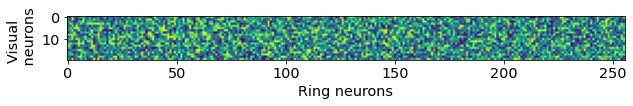

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(np.random.rand(N,M).T)       
ax.set_xlabel('Ring neurons',)                 # Landmark weights from Hebbian learning
ax.set_ylabel('Visual \n neurons') 

In [ ]:
def testing(W_LM, s_0, animal_vel, visual, num_session, e_PI, step):
  s = np.zeros((N, num_session*step))
  s[:,0] = s_0
  peaks = np.zeros(num_session*step)
  #peak_L = np.zeros(num_session*step)
  peaksA = np.zeros(num_session*step)
  #k_A = np.zeros(num_session*step)
  animal_pos = calc_animal_pos(num_session,step,animal_vel)
  #s_inds, sL, k_L = generate_visual(animal_pos, M)
  dT = dt*step
  for i in range(num_session*step-1):
      peaks[i], peaksA[i] = find_peak(s[:,i])
      if i <= 1000:
        s[:,i+1] = updateFR(s[:,i],animal_vel,e_PI)
      else:
        #visual, peak_L[i] = generate_visual(peak_L[i], M)
        s[:,i+1] = updateFR_with_visual(s[:,i],visual[:,i],animal_vel,e_PI,W_LM)
  return s, peaks, peaksA

In [ ]:
num_session = 10
step = 4000
np.random.seed(0)
s_0 = np.random.normal(0,0.1,(N))
s, peaks, peaksA = testing(learned_W, s_0, 8, training_visual, num_session, e_PI, step)

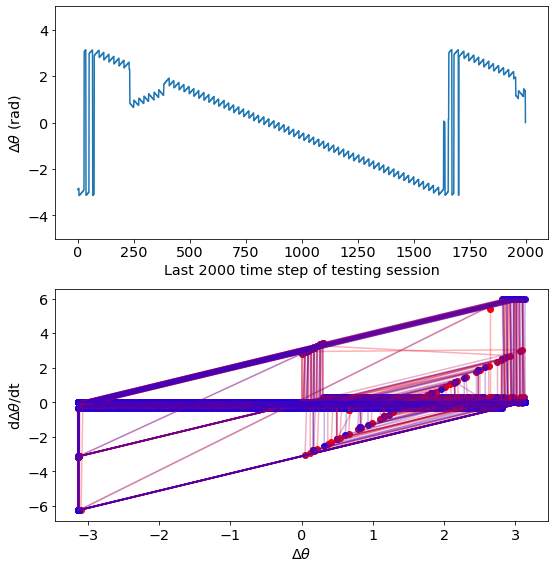

In [ ]:
phase_I = 2*np.pi*peaks/N
phase_v = training_phase
phase_dif = phase_I-phase_v 
phase_dif = [(np.pi-phase_dif[i])/abs((np.pi-phase_dif[i]))*((np.pi-phase_dif[i])%(np.pi)) if abs(phase_dif[i]) > np.pi else phase_dif[i] for i in range(len(phase_dif))]
dDelta_dt = np.diff(phase_dif)
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].plot(np.arange(2000), phase_dif[-2000:])
ax[0].set_ylabel('$\Delta\\theta$ (rad)')
ax[0].set_xlabel('Last 2000 time step of testing session')
for i in range(0,n-s,s):
    ax[1].plot(phase_dif_ad[i:i+s+1],dDelta_dt[i:i+s+1],'-',color=(1-T[i],0,T[i]), alpha=0.3)
    ax[1].scatter(phase_dif_ad[i:i+s+1],dDelta_dt[i:i+s+1],color=(1-T[i],0,T[i]))
ax[1].set_xlabel('$\Delta\\theta$')
ax[1].set_ylabel('d$\Delta\\theta$/dt')
ax[0].set_ylim(-5,5)
fig.tight_layout()
#ax.plot(np.arange(step*num_session), phase_I)  
#ax.plot(np.arange(step*num_session), phase_v)  

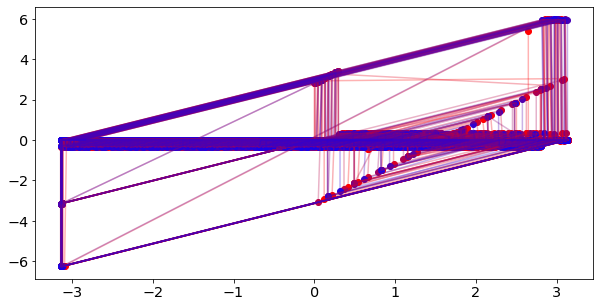

In [ ]:
import copy
#phase_difference = [phaseA-phaseL for phaseA,phaseL in zip(phi_A_t,phi_L_t)]
#deltaPhi = copy.copy(phase_difference)
phase_dif_ad = phase_dif[1:]
T=np.linspace(0,1,np.size(dDelta_dt))**2
fig = plt.figure()
ax = fig.add_subplot(111)
s = 1000 # Segment length
n= num_session*step
for i in range(0,n-s,s):
    ax.plot(phase_dif_ad[i:i+s+1],dDelta_dt[i:i+s+1],'-',color=(1-T[i],0,T[i]), alpha=0.3)
    ax.scatter(phase_dif_ad[i:i+s+1],dDelta_dt[i:i+s+1],color=(1-T[i],0,T[i]))